Bitcoin Price Notifications

Source: https://realpython.com/python-bitcoin-ifttt/

In [ ]:
## Start by setting up a virtual enviorment
# python3 -m venv venv/
# source venv/bin/activate

## install dependency
# $ pip install requests==2.18.4  # We only need the requests package

## Delete the Virtual enviroment
# rm -rf venv

In [4]:
import requests
import schedule

In [ ]:
# Retrieve the Bitcoin price
bitcoin_api_url = 'https://api.coindesk.com/v1/bpi/currentprice.json' # addapted the API to a free one without AuthO
response = requests.get(bitcoin_api_url)
print(response)
response_json = response.json()
print(type(response_json))


<Response [200]>
<class 'dict'>


In [ ]:
def bitcoinPrice (currency = "USD", rate ="rate"): # #GBP, USD and EUR are available #'rate' and 'rate_float' are available
    if currency not in ["USD", "EUR", "GDP"]:
        print("Wrong currency, only USD, EUR and GDP are allowed")
        return
    bitcoin_api_url = 'https://api.coindesk.com/v1/bpi/currentprice.json' # addapted the API to a free one without AuthO
    response = requests.get(bitcoin_api_url)
    # print(response)
    if response.status_code != 200:
        print(f"Failed to access API, code: {response}")
        return
    else:
        response_json = response.json()
        return response_json["bpi"][currency][rate], response_json["time"]["updated"]

In [3]:
print(bitcoinPrice())

<Response [200]>
('79,828.899', 'Nov 10, 2024 13:32:56 UTC')


In [ ]:
# Scredueling 
# Source: https://www.youtube.com/watch?v=yDPQfj4bZY8; # https://www.youtube.com/watch?v=Gs5jGDROx1M; 
# pip install schedule
# 
# Syntax: schedule.every(5).seconds.do(Function) put into a loop

In [18]:
import time

times = 0
priceList = []
timeList = [] 
max = 10

while times < 10:
    # wait a minute
    time.sleep(60)
    # fetch the data
    price, X = bitcoinPrice()
    # add the data to a list
    priceList.append(price)
    timeList.append(X)
    # be sure to close the loop
    times += 1
    # print feedback
    print(f"New value added, {max-times} to go")
    

<Response [200]>
New value added, 9 to go
<Response [200]>
New value added, 8 to go
<Response [200]>
New value added, 7 to go
<Response [200]>
New value added, 6 to go
<Response [200]>
New value added, 5 to go
<Response [200]>
New value added, 4 to go
<Response [200]>
New value added, 3 to go
<Response [200]>
New value added, 2 to go
<Response [200]>
New value added, 1 to go
<Response [200]>
New value added, 0 to go


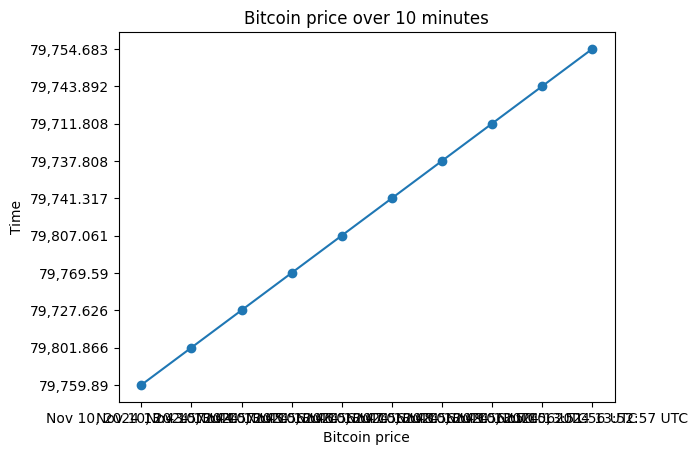

In [21]:
import matplotlib.pyplot as plt

plt.plot(timeList, priceList, marker="o")

plt.title(f"Bitcoin price over {max} minutes")
plt.xlabel("Bitcoin price")
plt.ylabel("Time")

plt.show()

In [22]:
import schedule
import time

# Define the function to run
def task():
    print("Task executed")

# Schedule the task every 5 seconds
schedule.every(5).seconds.do(task)

# Record the start time
start_time = time.time()

# Run the scheduled job for 1 minute
while True:
    # Run pending tasks
    schedule.run_pending()

    # Check if 1 minute has passed
    elapsed_time = time.time() - start_time
    if elapsed_time > 60:  # 1 minute = 60 seconds
        print("Stopping scheduler after 1 minute.")
        break

    # Sleep to prevent excessive CPU usage
    time.sleep(1)


Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Task executed
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Task executed
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Task executed
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Task executed
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Task executed
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Task executed
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Task executed
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Task executed
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Task executed
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Task executed
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Task executed
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Task executed
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Stopping scheduler after 1 minute.


{'time': {'updated': 'Nov 9, 2024 21:17:28 UTC',
  'updatedISO': '2024-11-09T21:17:28+00:00',
  'updateduk': 'Nov 9, 2024 at 21:17 GMT'},
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org',
 'chartName': 'Bitcoin',
 'bpi': {'USD': {'code': 'USD',
   'symbol': '&#36;',
   'rate': '76,283.858',
   'description': 'United States Dollar',
   'rate_float': 76283.8576},
  'GBP': {'code': 'GBP',
   'symbol': '&pound;',
   'rate': '59,036.383',
   'description': 'British Pound Sterling',
   'rate_float': 59036.3825},
  'EUR': {'code': 'EUR',
   'symbol': '&euro;',
   'rate': '71,170.246',
   'description': 'Euro',
   'rate_float': 71170.2455}}}